### Luca Dal Zotto   1236343
# Machine Learning Project - “Fashion-MNIST Challenge”
Website reference: https://github.com/zalandoresearch/fashion-mnist

## Table of contents
##### 1 Exploration and pre-processing
&emsp; 1.1 Dataset loading <br>
&emsp; 1.2 Feature scaling <br>
&emsp; 1.3 Class frequency <br>

##### 2 Training models
&emsp; 2.1 Subset extraction<br>
&emsp; 2.2 Logistic Regressionm<br>
&emsp; 2.3 KNN<br>
&emsp; 2.4 Random Forest<br>
&emsp; 2.5 SVM<br>
&emsp; 2.6 CNN<br>

##### 3 Comparisons and conclusions

#### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Point Colaboratory to your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#### Set folder

In [ ]:
# DATA_BASE_FOLDER = '/kaggle/input/image-classification-fashion-mnist' # if running on kaggle
# DATA_BASE_FOLDER = '.\dataset' # if running locally
DATA_BASE_FOLDER = '/content/gdrive/My Drive/^DATA SCIENCE/^ML/project/dataset' # COLAB

# 1 Exploration and pre-processing

## 1.1 Dataset loading

The dataset contains 50k train + 10k validation images of 10 different categories ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot').

Each image is a 28x28 grayscale, and here is flattened into a 784 dimensional vector.

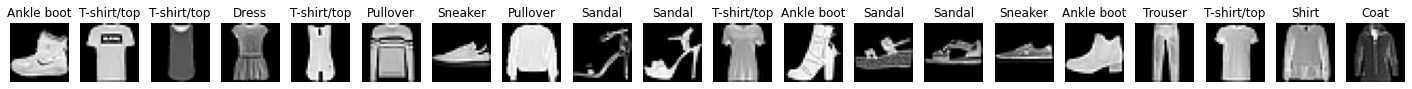

In [ ]:
# Load dataset
x_train = np.load(os.path.join(DATA_BASE_FOLDER, 'train.npy'))
x_valid = np.load(os.path.join(DATA_BASE_FOLDER, 'validation.npy'))
x_test = np.load(os.path.join(DATA_BASE_FOLDER, 'test.npy'))

y_train = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'train.csv'))['class'].values
y_valid = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'validation.csv'))['class'].values

y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot random images of different classes
plt.figure(figsize=(25, 5))
for idx in range(20):
    plt.subplot(1, 20, idx + 1)
    img = x_train[idx].reshape(28, 28)
    plt.title(f'{y_labels[y_train[idx]]}')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

## 1.2 Feature scaling

In [ ]:
# Shape of the three sets
print ("X_train shape: " + str(x_train.shape))
print ("X_valid shape: " + str(x_valid.shape))
print ("X_test shape: " + str(x_test.shape))

X_train shape: (50000, 784)
X_valid shape: (10000, 784)
X_test shape: (10000, 784)


In [ ]:
# First 200 dimensions of the first vector
x_train[0][:200]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# First 10 labels
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [ ]:
# Normalization of the dataset: the value of a pixel channel is between 0 and 255, so let's divide by 255

x_train_sd = x_train / 255.
x_valid_sd = x_valid / 255.
x_test_sd = x_test / 255.

# Concatenate training and validation set, if using cross-validation
x_sd = np.concatenate((x_train_sd, x_valid_sd), axis = 0)
y = np.concatenate((y_train,y_valid))

# One-hot encoding for the labels
# Not necessary using 'sparse_categorical_crossentropy
y_train_hot = np.eye(10)[y_train]
y_valid_hot = np.eye(10)[y_valid]

In [ ]:
# First 200 dimensions of the first vector after scaling
x_train_sd[0][:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# Shape of training-validation set (if cross-validation will be used)
print(x_sd.shape)
print(y.shape)

(60000, 784)
(60000,)


In [ ]:
# First 10 labels one-hot encoded
print(y_train_hot.shape)
print(y_train_hot[:10])

(50000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## 1.3 Class frequency
Compute the frequency of each class, to check whether the dataset is balanced or not


In [ ]:
classes, class_count = np.unique(y_train, return_counts=True)
pd.DataFrame((classes, class_count), columns=y_labels, index=['Label', 'Frequency'])

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Label,0,1,2,3,4,5,6,7,8,9
Frequency,4977,5012,4992,4979,4950,5004,5030,5045,5032,4979


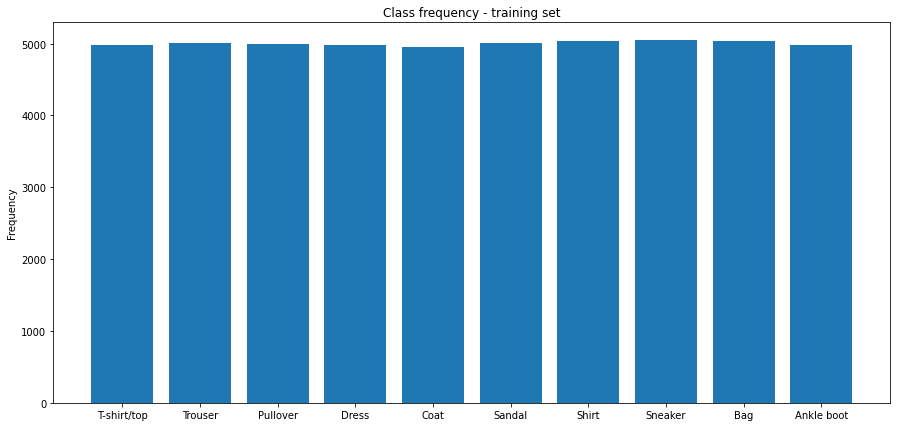

In [ ]:
# Plot the class frequency
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.bar(classes, class_count, label = y_labels)
ax.set_ylabel('Frequency')
ax.set_title('Class frequency - training set')
ax.set_xticks(np.arange(10))
ax.set_xticklabels(y_labels)
plt.show()

#### Do the same for the validation set


In [ ]:
classes, class_count = np.unique(y_valid, return_counts=True)
pd.DataFrame((classes, class_count), columns=y_labels, index=['Label', 'Frequency'])

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Label,0,1,2,3,4,5,6,7,8,9
Frequency,1023,988,1008,1021,1050,996,970,955,968,1021


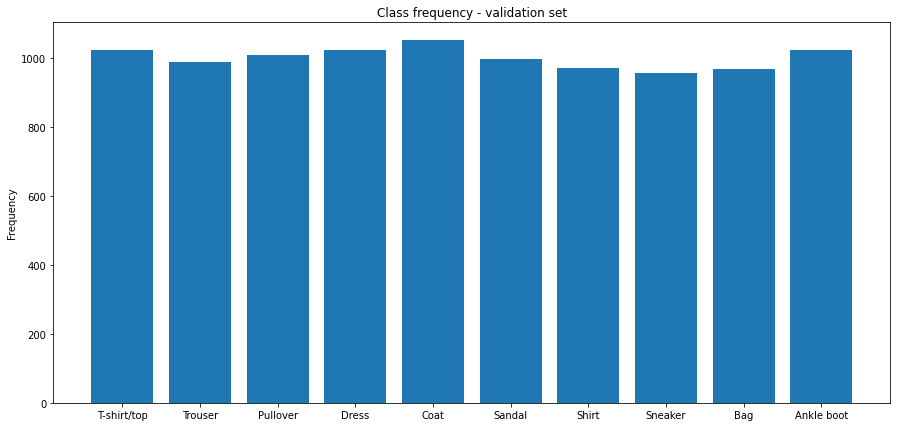

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.bar(classes, class_count, label = y_labels)
ax.set_ylabel('Frequency')
ax.set_title('Class frequency - validation set')
ax.set_xticks(np.arange(10))
ax.set_xticklabels(y_labels)
plt.show()

Observation: both the training and validation sets are quite balanced, so no actions have to be performed in that sense.

# 2 Training Models 

Here you have to implement a model (or more models, for finding the most accurate) for classification.

You can use the [`sklearn`](https://scikit-learn.org/stable/) (or optionally other more advanced frameworks such as [`pytorch`](https://pytorch.org/) or [`tensorflow`](https://www.tensorflow.org/)) package that contains a pool of models already implemented that perform classification. (SVMs, NNs, LR, kNN, ...)

In [ ]:
# Use this function to evaluate your model
def accuracy(y_pred, y_true):
    '''
    input y_pred: ndarray of shape (N,)
    input y_true: ndarray of shape (N,)
    '''
    return (1.0 * (y_pred == y_true)).mean()

## 2.1 Subset extraction
Select a subset of each set in order to speed up computation in the model selection and hyperparameter tuning phase

In [ ]:
# INPUT: feature matrix x and label vector y
# Output: subset of size 10% of x and y obtained in a stratified fashion

def select_subset(x,y):
    x_big, x_small, y_big, y_small = train_test_split(x, y, 
                                                      test_size = 0.1, 
                                                      random_state = 1, 
                                                      stratify = y)
    return x_small, y_small

In [ ]:
# Apply it to training and validation set: add _s (small) to the variable name
x_train_s, y_train_s = select_subset(x_train_sd, y_train)
x_valid_s, y_valid_s = select_subset(x_valid_sd, y_valid)

#### Check the shape and class frequency of these subsets

In [ ]:
print ("x_train_s shape: " + str(x_train_s.shape))
print ("x_valid_s shape: " + str(x_valid_s.shape))

x_train_s shape: (5000, 784)
x_valid_s shape: (1000, 784)


In [ ]:
classes, class_count = np.unique(y_train_s, return_counts=True)
pd.DataFrame((classes, class_count), columns=y_labels, index=['Label', 'Frequency'])

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Label,0,1,2,3,4,5,6,7,8,9
Frequency,498,501,499,498,495,500,503,505,503,498


In [ ]:
classes, class_count = np.unique(y_valid_s, return_counts=True)
pd.DataFrame((classes, class_count), columns=y_labels, index=['Label', 'Frequency'])

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Label,0,1,2,3,4,5,6,7,8,9
Frequency,102,99,101,102,105,100,97,95,97,102


**ATT:** In what follows, I implemented a grid search (most of the times two dimensional) for each model using the subsets just extracted.
In general this procedure does not guarantee that the resulting hyper-parameters would be optimal also for the original dataset, but at least this would give an approximate idea of the location of the optimal region of hyper-paramters. 

Therefore, after having found the optimal hyper-parameters for the smaller dataset, instead of implementing a grid search over a wide range of values for the whole dataset (computational prohibitive), I will just try a couple of values close to the optimal one for the smaller dataset.

## 2.2 Logistic Regression

In [ ]:
max_iters = [4, 8, 16, 32, 64, 80, 96, 114, 128, 150]
reg_term = [0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]
# max_iters -> Maximum number of iterations taken for the solvers to converge.
# reg_term -> Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.

# Initialize some matrices to store the training and validation accuracy of the different hyper-parameters combinations.
train_acc = np.zeros((10,11))
train_acc_df = pd.DataFrame(train_acc, columns = reg_term, index = max_iters)
validation_acc = np.zeros((10,11))
validation_acc_df = pd.DataFrame(validation_acc, columns = reg_term, index = max_iters)
execution_time = np.zeros((10,11))
execution_time_df = pd.DataFrame(execution_time, columns = reg_term, index = max_iters)

# Grid search
for m in max_iters:
    for C in reg_term:
    
        start_time = time.time()

        model_logreg = LogisticRegression(max_iter = m, C = C, random_state=1, solver='lbfgs', multi_class='auto')
        model_logreg.fit(x_train_s, y_train_s)
        y_train_pred = model_logreg.predict(x_train_s)
        y_valid_pred = model_logreg.predict(x_valid_s)

        run_time = (time.time() - start_time)

        train_acc_df.loc[m,C] = accuracy(y_train_pred, y_train_s)
        validation_acc_df.loc[m,C] = accuracy(y_valid_pred, y_valid_s)
        execution_time_df.loc[m,C] = run_time

In [ ]:
print('---- Training accuracy----')
train_acc_df

---- Training accuracy----


,0.001,0.010,0.100,1.000,5.000,10.000,20.000,40.000,60.000,80.000,100.000
4,0.6590,0.6478,0.6460,0.6458,0.6458,0.6456,0.6456,0.6456,0.6456,0.6456,0.6456
8,0.6914,0.7150,0.7212,0.7226,0.7232,0.7232,0.7232,0.7232,0.7232,0.7232,0.7232
16,0.7534,0.8132,0.8230,0.8108,0.8110,0.8108,0.8106,0.8106,0.8106,0.8106,0.8106
32,0.7628,0.8392,0.8562,0.8504,0.8510,0.8506,0.8494,0.8484,0.8482,0.8482,0.8482
64,0.7578,0.8352,0.8890,0.8962,0.8966,0.8934,0.8934,0.8950,0.8964,0.8962,0.8970
80,0.7582,0.8312,0.8936,0.9056,0.9130,0.9098,0.9100,0.9054,0.9114,0.9070,0.9120
96,0.7570,0.8320,0.8962,0.9198,0.9256,0.9216,0.9214,0.9200,0.9234,0.9216,0.9238
114,0.7576,0.8344,0.8952,0.9326,0.9376,0.9370,0.9340,0.9348,0.9374,0.9364,0.9378
128,0.7576,0.8336,0.8954,0.9338,0.9448,0.9438,0.9422,0.9442,0.9446,0.9432,0.9440
150,0.7576,0.8338,0.8946,0.9390,0.9552,0.9528,0.9526,0.9536,0.9540,0.9552,0.9528


In [ ]:
print('---- Validation accuracy----')
validation_acc_df

---- Validation accuracy----


,0.001,0.010,0.100,1.000,5.000,10.000,20.000,40.000,60.000,80.000,100.000
4,0.672,0.645,0.641,0.641,0.641,0.641,0.641,0.641,0.641,0.641,0.641
8,0.707,0.727,0.728,0.731,0.731,0.731,0.731,0.731,0.731,0.731,0.731
16,0.753,0.799,0.803,0.782,0.784,0.782,0.782,0.782,0.781,0.781,0.781
32,0.753,0.830,0.830,0.829,0.833,0.830,0.829,0.830,0.830,0.830,0.830
64,0.761,0.814,0.835,0.821,0.837,0.832,0.827,0.833,0.835,0.833,0.832
80,0.759,0.811,0.833,0.824,0.815,0.820,0.815,0.819,0.810,0.821,0.820
96,0.759,0.810,0.833,0.825,0.821,0.814,0.813,0.818,0.819,0.817,0.820
114,0.759,0.814,0.834,0.831,0.822,0.820,0.820,0.822,0.822,0.818,0.824
128,0.759,0.813,0.832,0.830,0.824,0.824,0.819,0.824,0.825,0.817,0.823
150,0.759,0.812,0.832,0.828,0.818,0.818,0.813,0.815,0.816,0.812,0.815


In [ ]:
print('---- Execution time----')
execution_time_df

---- Execution time----


,0.001,0.010,0.100,1.000,5.000,10.000,20.000,40.000,60.000,80.000,100.000
4,0.178455,0.157385,0.181894,0.165468,0.195133,0.172027,0.180024,0.169907,0.171956,0.159112,0.180064
8,0.249100,0.261966,0.256307,0.258980,0.252031,0.248163,0.254961,0.257950,0.267652,0.246022,0.249020
16,0.425405,0.474043,0.466987,0.406557,0.421483,0.395523,0.416847,0.427951,0.431948,0.449990,0.411576
32,0.781459,0.870512,0.826670,0.789800,0.830748,0.871185,0.853251,0.846946,0.791501,0.801554,0.801043
64,1.539439,1.506363,1.524131,1.640798,1.593860,1.562023,1.545702,1.535482,1.507036,1.528346,1.473693
80,1.866423,1.898587,1.879928,1.926853,1.910518,2.048892,1.943717,2.057973,1.960317,1.999923,1.975013
96,2.335295,2.321208,2.334772,2.390256,2.337895,2.377281,2.262403,2.296194,2.295601,2.192413,2.182111
114,2.609504,2.631163,2.679899,2.761283,2.684377,2.678100,2.646340,2.586516,2.555561,2.512546,2.555799
128,2.616392,2.751237,2.837344,2.948220,2.877500,2.846561,2.829887,2.873499,2.852899,2.763347,2.785289
150,2.541808,3.250995,3.400830,3.489708,3.441042,3.393880,3.261118,3.303099,3.339390,3.305888,3.303348


##### Graphical representation

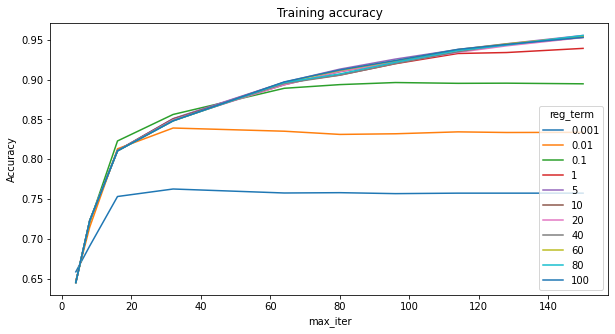

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.plot(train_acc_df)
ax.set_ylabel('Accuracy')
ax.set_xlabel('max_iter')
ax.set_title('Training accuracy')
ax.legend(reg_term, title = 'reg_term')
plt.show()

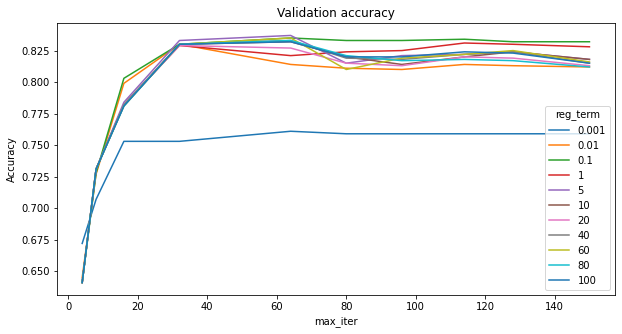

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.plot(validation_acc_df.iloc[:,:])
ax.set_ylabel('Accuracy')
ax.set_xlabel('max_iter')
ax.set_title('Validation accuracy')
ax.legend(reg_term, title = 'reg_term')
plt.show()

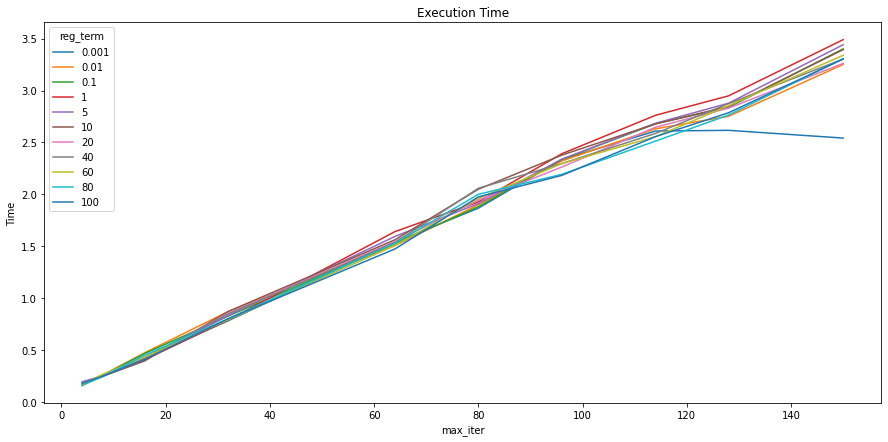

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.plot(execution_time_df)
ax.set_ylabel('Time')
ax.set_xlabel('max_iter')
ax.set_title('Execution Time')
ax.legend(reg_term, title = 'reg_term')
plt.show()

##### Now let's train the model on the original training set tring just a couple of values for the hyper-parameters close to the optimal one for the small dataset.
Here only the best combiantion is reported.

In [ ]:
model_logreg = LogisticRegression(max_iter = 128, C = 10, random_state = 1, solver='lbfgs', multi_class='auto')
start_time = time.time()
model_logreg.fit(x_train, y_train)
run_time_logreg_fit = (time.time() - start_time)

In [ ]:
start_time = time.time()
y_train_pred_logreg = model_logreg.predict(x_train)
y_valid_pred_logreg = model_logreg.predict(x_valid)
run_time_logreg_predict = (time.time() - start_time)

In [ ]:
train_acc_logreg = accuracy(y_train_pred_logreg, y_train)
validation_acc_logreg = accuracy(y_valid_pred_logreg, y_valid)

In [ ]:
print('Training accuracy:', train_acc_logreg)
print('Validation accuracy:', validation_acc_logreg)

Training accuracy: 0.8672
Validation accuracy: 0.8507


Prediction on the test set

In [ ]:
y_test_logreg = pd.DataFrame(model_logreg.predict(x_test))
y_test_logreg = y_test_logreg.to_csv('/content/gdrive/My Drive/^DATA SCIENCE/^ML/project/dataset/y_test_logreg.csv', sep=',', index = True)

In [ ]:
test_acc_logreg = 0.84240

## 2.3 KNN

In [ ]:
n_neighbors = [1, 2, 3, 5, 10, 20, 30, 50]
# n_neighbors -> Number of neighbors to use by default for kneighbors queries.

# Initialize some matrices to store the training and validation accuracy of the different hyper-parameters combinations.
train_acc = np.zeros(8)
validation_acc = np.zeros(8)
execution_time = np.zeros(8)

# Grid search
for i in [0,1,2,3,4,5,6,7]:
    
        k = n_neighbors[i]
   
        start_time = time.time()
        
        model_knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
        model_knn.fit(x_train_s, y_train_s)
        y_train_pred = model_knn.predict(x_train_s)
        y_valid_pred = model_knn.predict(x_valid_s)

        run_time = (time.time() - start_time)

        train_acc[i] = accuracy(y_train_pred, y_train_s)
        validation_acc[i] = accuracy(y_valid_pred, y_valid_s)
        execution_time[i] = run_time

In [ ]:
print('---- Training accuracy----')
train_acc

---- Training accuracy----


array([1.    , 0.9034, 0.881 , 0.8546, 0.8342, 0.8034, 0.793 , 0.7796])

In [ ]:
print('---- Validation accuracy----')
validation_acc

---- Validation accuracy----


array([0.788, 0.786, 0.799, 0.804, 0.794, 0.783, 0.777, 0.765])

In [ ]:
print('---- Execution time----')
execution_time

---- Execution time----


array([10.5441227 , 30.89271235, 31.38604045, 31.7956202 , 32.38684821,
       32.68573833, 32.82095098, 33.11280608])

##### Graphical representation

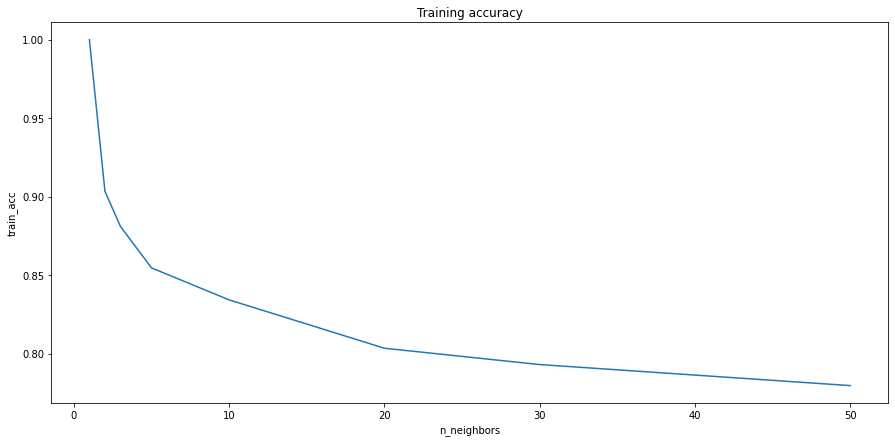

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.plot(n_neighbors, train_acc)
ax.set_ylabel('train_acc')
ax.set_xlabel('n_neighbors')
ax.set_title('Training accuracy')
plt.show()

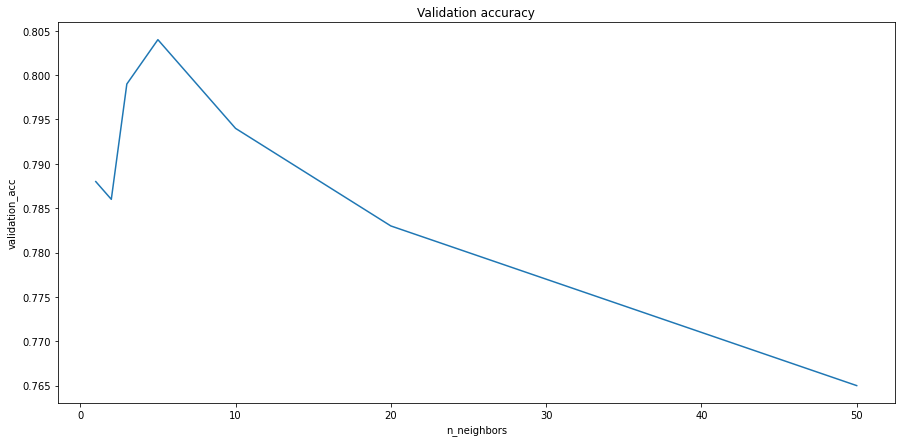

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.plot(n_neighbors, validation_acc)
ax.set_ylabel('validation_acc')
ax.set_xlabel('n_neighbors')
ax.set_title('Validation accuracy')
plt.show()

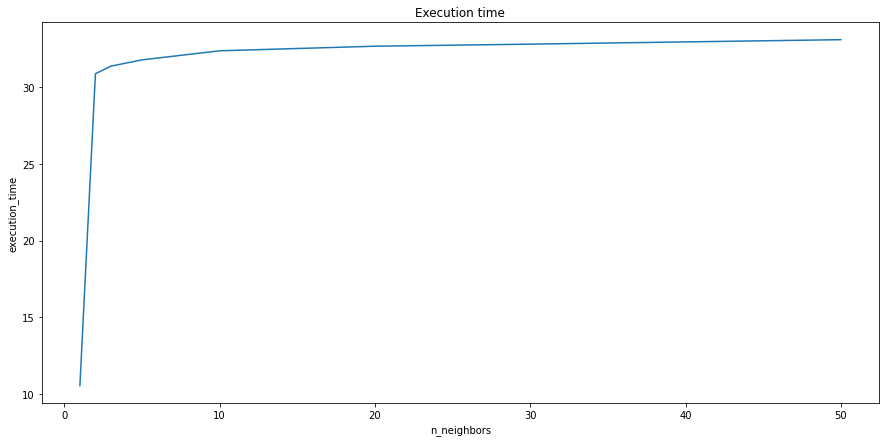

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.plot(n_neighbors, execution_time)
ax.set_ylabel('execution_time')
ax.set_xlabel('n_neighbors')
ax.set_title('Execution time')
plt.show()

##### Now let's train the model on the original training set tring just a couple of values for the hyper-parameters close to the optimal one for the small dataset.
Here only the best combiantion is reported.

In [ ]:
start_time = time.time()
model_knn = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1)
model_knn.fit(x_train, y_train)
run_time_knn_fit = (time.time() - start_time)

In [ ]:
start_time = time.time()
y_train_pred_knn = model_knn.predict(x_train)
y_valid_pred_knn = model_knn.predict(x_valid)
run_time_knn_predict = (time.time() - start_time)

In [ ]:
train_acc_knn = accuracy(y_train_pred_knn, y_train)
validation_acc_knn = accuracy(y_valid_pred_knn, y_valid)

In [ ]:
print('Training accuracy:', train_acc_knn)
print('Validation accuracy:', validation_acc_knn)

Training accuracy: 0.91748
Validation accuracy: 0.853


Prediction on the test set

In [ ]:
y_test_knn = pd.DataFrame(model_knn.predict(x_test))
y_test_knn = y_test_knn.to_csv('/content/gdrive/My Drive/^DATA SCIENCE/^ML/project/dataset/y_test_knn.csv', sep=',', index = True)

In [ ]:
test_acc_knn = 0.85820

## 2.4 Random Forest

In [ ]:
n_estimators = [1, 20, 50, 75, 100, 130, 165, 200, 250, 500]
max_depth = [10, 20, 50, 75, 100, 130, 165, 200]
# n_estimators -> The number of trees in the forest.
# max_depth -> The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain
# less than min_samples_split samples (default = 2).

# Initialize some matrices to store the training and validation accuracy of the different hyper-parameters combinations.
train_acc = np.zeros((10,8))
train_acc_df = pd.DataFrame(train_acc, columns=max_depth, index = n_estimators)
validation_acc = np.zeros((10,8))
validation_acc_df = pd.DataFrame(validation_acc, columns=max_depth, index = n_estimators)
execution_time = np.zeros((10,8))
execution_time_df = pd.DataFrame(execution_time, columns=max_depth, index = n_estimators)

# Grid search
for n in n_estimators:
    for d in max_depth:
    
        start_time = time.time()

        model_rf = RandomForestClassifier(n_estimators = n, max_depth = d, n_jobs=-1, random_state = 1)
        model_rf.fit(x_train_s, y_train_s)
        y_train_pred = model_rf.predict(x_train_s)
        y_valid_pred = model_rf.predict(x_valid_s)

        run_time = (time.time() - start_time)

        train_acc_df.loc[n,d] = accuracy(y_train_pred, y_train_s)
        validation_acc_df.loc[n,d] = accuracy(y_valid_pred, y_valid_s)
        execution_time_df.loc[n,d] = run_time


In [ ]:
print('---- Training accuracy----')
train_acc_df

---- Training accuracy----


,10,20,50,75,100,130,165,200
1,0.8180,0.8860,0.8860,0.8860,0.8860,0.8860,0.8860,0.8860
20,0.9436,0.9988,0.9984,0.9984,0.9984,0.9984,0.9984,0.9984
50,0.9476,0.9996,0.9996,0.9996,0.9996,0.9996,0.9996,0.9996
75,0.9508,0.9996,0.9998,0.9998,0.9998,0.9998,0.9998,0.9998
100,0.9528,0.9998,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
130,0.9518,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
165,0.9512,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
200,0.9498,0.9998,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
250,0.9504,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
500,0.9514,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
print('---- Validation accuracy----')
validation_acc_df

---- Validation accuracy----


,10,20,50,75,100,130,165,200
1,0.697,0.676,0.676,0.676,0.676,0.676,0.676,0.676
20,0.826,0.833,0.840,0.840,0.840,0.840,0.840,0.840
50,0.824,0.842,0.844,0.844,0.844,0.844,0.844,0.844
75,0.830,0.844,0.850,0.850,0.850,0.850,0.850,0.850
100,0.833,0.842,0.845,0.845,0.845,0.845,0.845,0.845
130,0.836,0.848,0.852,0.852,0.852,0.852,0.852,0.852
165,0.837,0.850,0.854,0.854,0.854,0.854,0.854,0.854
200,0.836,0.848,0.851,0.851,0.851,0.851,0.851,0.851
250,0.840,0.849,0.849,0.849,0.849,0.849,0.849,0.849
500,0.839,0.850,0.851,0.851,0.851,0.851,0.851,0.851


In [ ]:
print('---- Execution time----')
execution_time_df

---- Execution time----


,10,20,50,75,100,130,165,200
1,0.132219,0.125173,0.126037,0.130461,0.125701,0.124223,0.124004,0.124090
20,0.933426,1.033216,1.134081,1.034297,1.034308,1.135081,1.033722,1.135049
50,1.846572,2.251888,2.246290,2.249314,2.249429,2.249600,2.246835,2.246207
75,2.654763,3.257499,3.355589,3.362675,3.256633,3.356231,3.263531,3.260546
100,3.365482,4.266775,4.269795,4.268073,4.266976,4.269130,4.367052,4.267791
130,4.478754,5.685613,5.579813,5.585364,5.690172,5.583447,5.578419,5.585913
165,5.497803,6.898631,6.995201,6.902252,6.893972,6.895742,6.992455,6.908653
200,6.706490,8.413141,8.409856,8.310238,8.309803,8.210998,8.207236,8.213220
250,8.224130,10.227440,10.225591,10.127461,10.132025,10.226760,10.126838,10.224501
500,16.119496,19.945794,19.937502,19.958686,19.934365,19.938095,19.731430,19.844967


##### Graphical representation

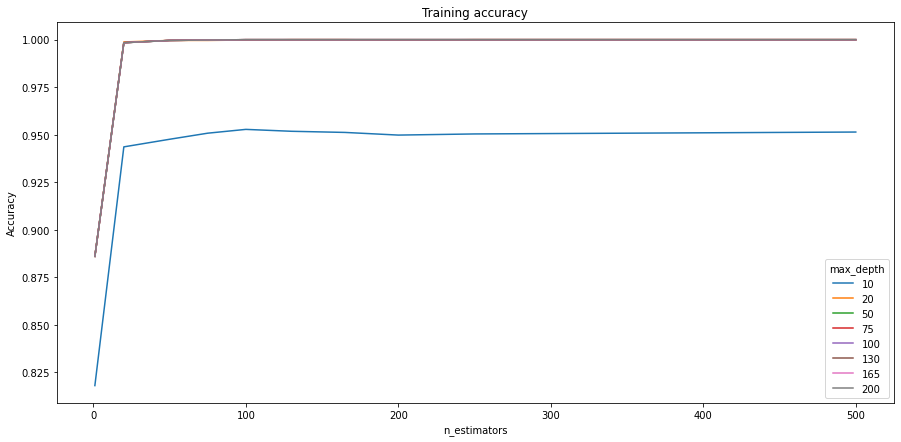

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.plot(train_acc_df)
ax.set_ylabel('Accuracy')
ax.set_xlabel('n_estimators')
ax.set_title('Training accuracy')
ax.legend(max_depth, title = 'max_depth')
plt.show()

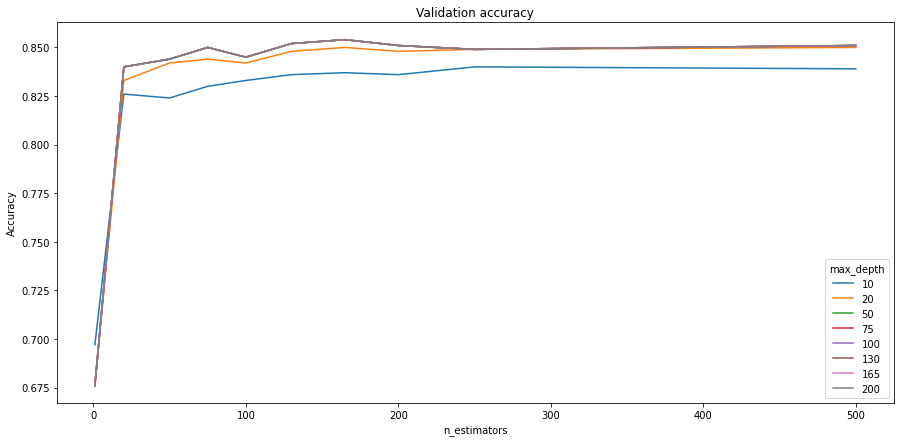

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.plot(validation_acc_df)
ax.set_ylabel('Accuracy')
ax.set_xlabel('n_estimators')
ax.set_title('Validation accuracy')
ax.legend(max_depth, title = 'max_depth')
plt.show()

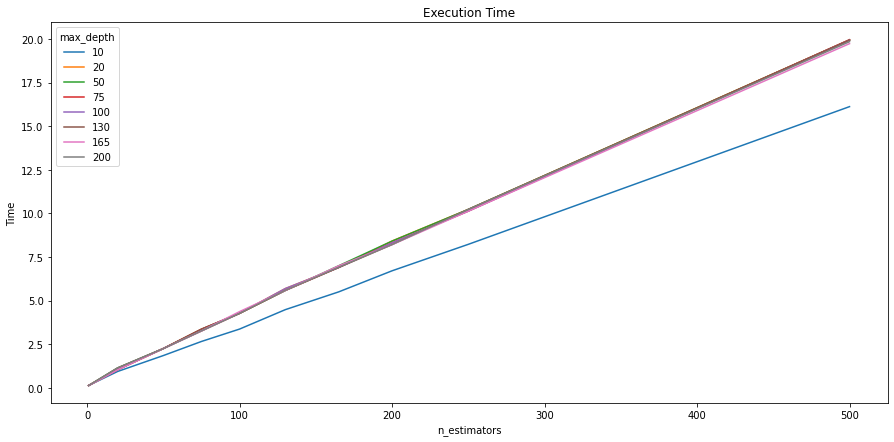

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.plot(execution_time_df)
ax.set_ylabel('Time')
ax.set_xlabel('n_estimators')
ax.set_title('Execution Time')
ax.legend(max_depth, title = 'max_depth')
plt.show()

##### Now let's train the model on the original training set tring just a couple of values for the hyper-parameters close to the optimal one for the small dataset.
Here only the best combiantion is reported.

In [ ]:
start_time = time.time()
model_rf = RandomForestClassifier(n_estimators = 165, max_depth = 75, n_jobs=-1, random_state = 1)
model_rf.fit(x_train, y_train)
run_time_rf_fit = (time.time() - start_time)

In [ ]:
start_time = time.time()
y_train_pred_rf = model_rf.predict(x_train)
y_valid_pred_rf = model_rf.predict(x_valid)
run_time_rf_predict = (time.time() - start_time)

In [ ]:
train_acc_rf = accuracy(y_train_pred_rf, y_train)
validation_acc_rf = accuracy(y_valid_pred_rf, y_valid)

In [ ]:
print('Training accuracy:', train_acc_rf)
print('Validation accuracy:', validation_acc_rf)

Training accuracy: 1.0
Validation accuracy: 0.8829


Even though it seems like it's overfitting, if the complexity of the model is reduced by selecting smaller trees (small max_depth), the performances in the validation set decrese, so it is convenient to keep these hyperparameters.

Prediction on the test set

In [ ]:
y_test_rf = pd.DataFrame(model_rf.predict(x_test))
y_test_rf = y_test_rf.to_csv('/content/gdrive/My Drive/^DATA SCIENCE/^ML/project/dataset/y_test_rf.csv', sep=',', index = True)

In [ ]:
test_acc_rf = 0.87740

## 2.5 SVM

In [ ]:
C = [0.01, 0.1, 1, 10, 50, 100]
kernel = ['linear', 'poly', 'sigmoid', 'rbf']
# C -> Regularization parameter. The strength of the regularization is inversely proportional to C.
# kernel -> Specifies the kernel type to be used in the algorithm. 

# Initialize some matrices to store the training and validation accuracy of the different hyper-parameters combinations.
train_acc = np.zeros((6,4))
train_acc_df = pd.DataFrame(train_acc, columns=kernel, index = C)
validation_acc = np.zeros((6,4))
validation_acc_df = pd.DataFrame(validation_acc, columns=kernel, index = C)
execution_time = np.zeros((6,4))
execution_time_df = pd.DataFrame(execution_time, columns=kernel, index = C)

# Grid search
for c in C:
    for k in kernel: 
    
        start_time = time.time()

        model_svm = SVC(kernel=k, C = c, gamma='scale')
        model_svm.fit(x_train_s, y_train_s)
        y_train_pred = model_svm.predict(x_train_s)
        y_valid_pred = model_svm.predict(x_valid_s)

        run_time = (time.time() - start_time)

        train_acc_df.loc[c,k] = accuracy(y_train_pred, y_train_s)
        validation_acc_df.loc[c,k] = accuracy(y_valid_pred, y_valid_s)
        execution_time_df.loc[c,k] = run_time

In [ ]:
print('---- Training accuracy----')
train_acc_df

---- Training accuracy----


,linear,poly,sigmoid,rbf
0.01,0.8534,0.6218,0.3384,0.6416
0.10,0.9224,0.7618,0.4312,0.7864
1.00,0.9798,0.8942,0.3674,0.8904
10.00,0.9998,0.9726,0.3870,0.9886
50.00,1.0000,0.9934,0.3642,1.0000
100.00,1.0000,0.9952,0.3644,1.0000


In [ ]:
print('---- Validation accuracy----')
validation_acc_df

---- Validation accuracy----


,linear,poly,sigmoid,rbf
0.01,0.828,0.624,0.326,0.655
0.10,0.839,0.723,0.439,0.784
1.00,0.830,0.794,0.391,0.857
10.00,0.813,0.838,0.406,0.869
50.00,0.814,0.840,0.379,0.865
100.00,0.814,0.843,0.377,0.864


In [ ]:
print('---- Execution time----')
execution_time_df

---- Execution time----


,linear,poly,sigmoid,rbf
0.01,26.655854,54.095088,88.641113,81.682301
0.10,22.214571,36.179370,61.135137,44.101347
1.00,21.757045,26.926431,41.421386,29.500424
10.00,21.978311,21.742576,38.236568,27.891134
50.00,21.973799,19.901892,37.873281,28.462910
100.00,21.883813,19.290211,37.470940,28.368268


##### Graphical representation

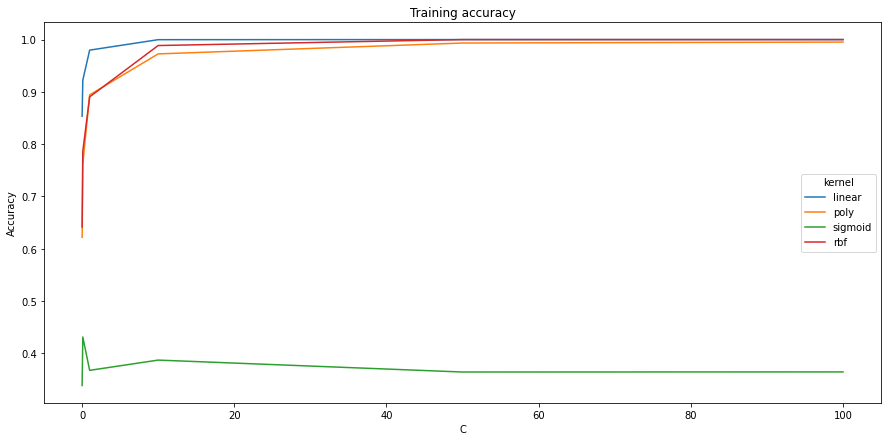

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.plot(train_acc_df)
ax.set_ylabel('Accuracy')
ax.set_xlabel('C')
ax.set_title('Training accuracy')
ax.legend(kernel, title = 'kernel')
plt.show()

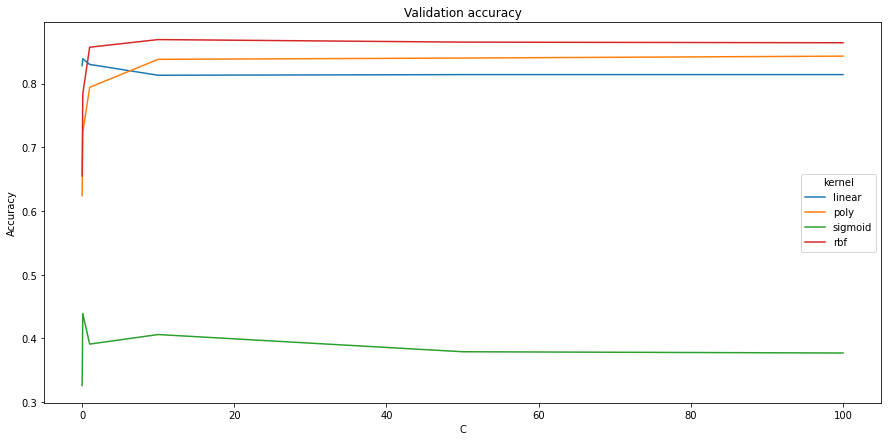

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.plot(validation_acc_df)
ax.set_ylabel('Accuracy')
ax.set_xlabel('C')
ax.set_title('Validation accuracy')
ax.legend(kernel, title = 'kernel')
plt.show()

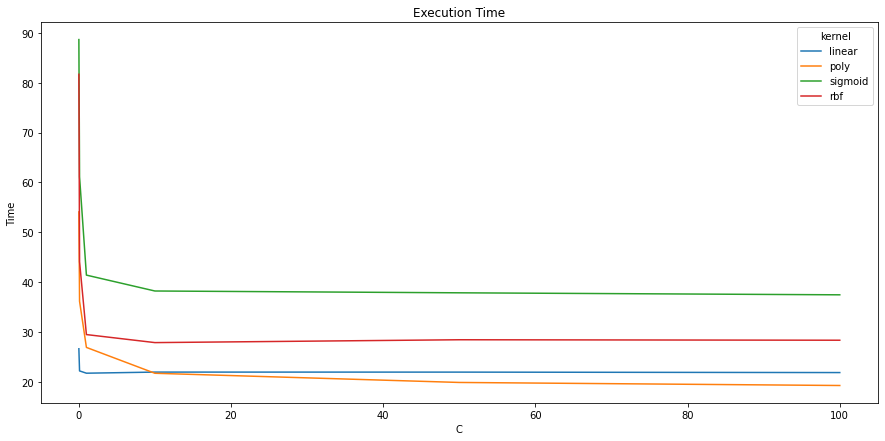

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = ax.plot(execution_time_df)
ax.set_ylabel('Time')
ax.set_xlabel('C')
ax.set_title('Execution Time')
ax.legend(kernel, title = 'kernel')
plt.show()

##### Now let's train the model on the original training set tring just a couple of values for the hyper-parameters close to the optimal one for the small dataset.
Here only the best combiantion is reported.

In [ ]:
start_time = time.time()
model_svm = SVC(kernel='rbf', C = 10, gamma='scale')
model_svm.fit(x_train, y_train)
run_time_svm_fit = (time.time() - start_time)

In [ ]:
start_time = time.time()
y_train_pred_svm = model_svm.predict(x_train)
y_valid_pred_svm = model_svm.predict(x_valid)
run_time_svm_predict = (time.time() - start_time)

In [ ]:
train_acc_svm = accuracy(y_train_pred_svm, y_train)
validation_acc_svm = accuracy(y_valid_pred_svm, y_valid)

In [ ]:
print('Training accuracy:', train_acc_svm)
print('Validation accuracy:', validation_acc_svm)

Training accuracy: 0.9736
Validation accuracy: 0.9003


Prediction on the test set

In [ ]:
y_test_svm = pd.DataFrame(model_svm.predict(x_test))
y_test_svm = y_test_svm.to_csv('/content/gdrive/My Drive/^DATA SCIENCE/^ML/project/dataset/y_test_svm.csv', sep=',', index = True)

In [ ]:
test_acc_svm = 0.89720

## 2.6 CNN

In [ ]:
x_train_cnn = x_train_sd.reshape(-1,28,28,1)
x_valid_cnn = x_valid_sd.reshape(-1,28,28,1)

print("x_train_cnn shape: " + str(x_train_cnn.shape))
print("x_valid_cnn shape: " + str(x_valid_cnn.shape))

print("y_train shape: " + str(y_train.shape))
print("y_valid shape: " + str(y_valid.shape))

x_train_cnn shape: (50000, 28, 28, 1)
x_valid_cnn shape: (10000, 28, 28, 1)
y_train shape: (50000,)
y_valid shape: (10000,)


In [ ]:
# Convert to tensor and change dtypes to speed up computations on the GPU
x_train_cnn = tf.convert_to_tensor(x_train_cnn, tf.float32)
x_valid_cnn = tf.convert_to_tensor(x_valid_cnn, tf.float32)

y_train = tf.convert_to_tensor(y_train, tf.int8)
y_valid = tf.convert_to_tensor(y_valid, tf.int8)

In [ ]:
def cnn_model(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(filters = 32,
               kernel_size = (3, 3), 
               name='conv00', 
               padding='same',
               activation='relu')(X_input)
    X = Dropout(0.1)(X)
    
    X = Conv2D(filters = 64,
               kernel_size = (3, 3), 
               name='conv01', 
               padding='same',
               activation='relu')(X)
    X = Dropout(0.25)(X)
    
    X = Conv2D(filters=64,
               kernel_size=(3, 3), 
               name='conv02', 
               padding='same',
               activation='relu')(X)
    X= MaxPooling2D(pool_size=(2, 2))(X)    
    X = Dropout(0.25)(X)
    
    X = Conv2D(filters=64,
               kernel_size=(3, 3), 
               name='conv03', 
               padding='same',
               activation='relu')(X)
    X= MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)
    
    X = Flatten()(X)
    X = Dense(units= 128, activation='tanh')(X)
    X = Dropout(0.25)(X)
    
    X = Dense(units= 10, activation='softmax')(X)

    model = Model(inputs = X_input, outputs = X, name='model_final')

    return model

In [ ]:
input_shape=(28,28,1)  
cnn_model = cnn_model(input_shape)

In [ ]:
cnn_model.compile(optimizer ="adam", 
               loss =  'sparse_categorical_crossentropy',
               metrics = ["accuracy"])

In [ ]:
cnn_model.summary()

Model: "model_final"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv00 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv01 (Conv2D)              (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv02 (Conv2D)              (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        

In [ ]:
#interrupt training when it measures no progress on the validation set for a number of epochs (patience)
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

In [ ]:
# Save the model when its performance on the validation set is the best so far
model_checkpoint = ModelCheckpoint(filepath='/content/gdrive/My Drive/^DATA SCIENCE/^ML/project/dataset/cnn_f.h5', save_weights_only=False, monitor='val_accuracy',
                                                                mode='max', save_best_only=True)

In [ ]:
start_time = time.time()
history = cnn_model.fit(x = x_train_cnn, y = y_train, epochs = 64, batch_size = 64, validation_data=(x_valid_cnn, y_valid), callbacks=[early_stopping, model_checkpoint])
run_time_cnn_fit = (time.time() - start_time)

Epoch 1/64
782/782 [==============================] - 8s 11ms/step - loss: 0.5048 - accuracy: 0.8157 - val_loss: 0.3091 - val_accuracy: 0.8868
Epoch 2/64
782/782 [==============================] - 8s 10ms/step - loss: 0.3136 - accuracy: 0.8866 - val_loss: 0.2641 - val_accuracy: 0.9006
Epoch 3/64
782/782 [==============================] - 8s 11ms/step - loss: 0.2651 - accuracy: 0.9020 - val_loss: 0.2334 - val_accuracy: 0.9140
Epoch 4/64
782/782 [==============================] - 8s 11ms/step - loss: 0.2400 - accuracy: 0.9109 - val_loss: 0.2290 - val_accuracy: 0.9159
Epoch 5/64
782/782 [==============================] - 8s 10ms/step - loss: 0.2203 - accuracy: 0.9187 - val_loss: 0.2053 - val_accuracy: 0.9244
Epoch 6/64
782/782 [==============================] - 8s 10ms/step - loss: 0.2065 - accuracy: 0.9229 - val_loss: 0.1999 - val_accuracy: 0.9257
Epoch 7/64
782/782 [==============================] - 8s 10ms/step - loss: 0.1969 - accuracy: 0.9273 - val_loss: 0.1976 - val_accuracy: 0.9282

In [ ]:
start_time = time.time()
train_loss_cnn, train_acc_cnn = cnn_model.evaluate(x_train_cnn, y_train, verbose=3)
validation_loss_cnn, validation_acc_cnn = cnn_model.evaluate(x_valid_cnn, y_valid, verbose=3)
run_time_cnn_predict = (time.time() - start_time)

In [ ]:
print("Final Loss on Training Set: {}; \nFinal Accuracy on Validation Set: {}".format(round(train_loss_cnn,3), round(train_acc_cnn,3)))
print("Final Loss on Validation Set: {}; \nFinal Accuracy on Validation Set: {}".format(round(validation_loss_cnn,3), round(validation_acc_cnn,3)))

Final Loss on Training Set: 0.081; 
Final Accuracy on Validation Set: 0.971
Final Loss on Validation Set: 0.19; 
Final Accuracy on Validation Set: 0.937


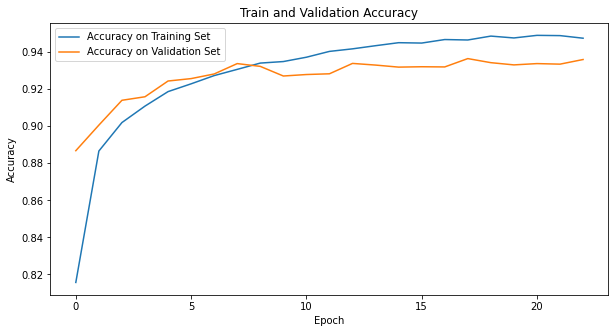

In [ ]:
# plot learning curves
plt.figure(figsize=(10,5))
plt.plot(history.epoch,history.history['accuracy'], label = "Accuracy on Training Set")
plt.plot(history.epoch,history.history['val_accuracy'], label = "Accuracy on Validation Set")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
_ = plt.title('Train and Validation Accuracy')

In [ ]:
val_steps = int(np.ceil(len(x_valid_cnn)/64))
y_prob_cnn = cnn_model.predict(x_valid_cnn, batch_size = 64, steps = val_steps)
y_pred_cnn = np.argmax(y_prob_cnn, axis=1)

Text(0, 0.5, 'Proportion')

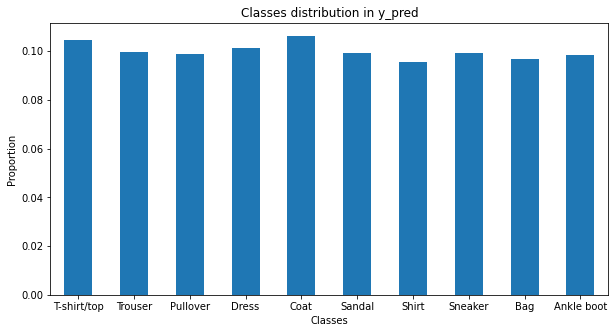

In [ ]:
# check y_pred class distribution
y_pred_df=pd.DataFrame(y_pred_cnn)
freq_y_pred=y_pred_df[0].value_counts().sort_index()/y_pred_df.shape[0]
fig, ax = plt.subplots(figsize=(10,5))
freq_y_pred.plot.bar(rot = 0)
plt.title('Classes distribution in y_pred') 
plt.xticks(ticks = range(10), labels = y_labels)
plt.xlabel('Classes');plt.ylabel('Proportion')

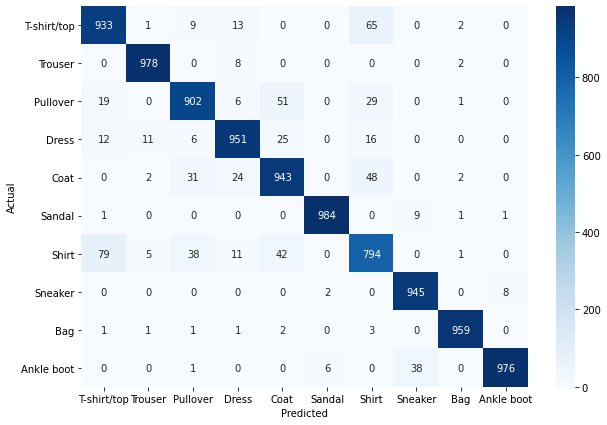

In [ ]:
conf_mat = confusion_matrix(y_valid, y_pred_cnn)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=y_labels, yticklabels=y_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Prediction on test set

In [ ]:
# load the model
# cnn_model = tf.keras.models.load_model('/content/gdrive/My Drive/^DATA SCIENCE/^ML/project/dataset/cnn_f.h5')

In [ ]:
x_test_cnn = x_test_sd.reshape(x_test_sd.shape[0],28,28,1)
y_test_prob = cnn_model.predict(x_test_cnn)

In [ ]:
# our network predictions are in the format of a 10 component vector, which is the output of the softmax function.
# We need to take the argmax of those vectors!
y_test_cnn = np.argmax(y_test_prob, axis = 1)

In [ ]:
# save that on a .csv file for the submission
y_test_cnn_file = pd.DataFrame(y_test_cnn)
# y_test_cnn_file = y_test_cnn_file.to_csv('y_test_cnn.csv', sep=',', index = False) # local
y_test_cnn_file = y_test_cnn_file.to_csv('/content/gdrive/My Drive/^DATA SCIENCE/^ML/project/dataset/y_test_cnn_f.csv', sep=',', index = True)

In [ ]:
test_acc_cnn = 0.93160

# 3 Comparisons and conclusions

In [ ]:
accuracy_comparison = pd.DataFrame(np.array([[train_acc_logreg, train_acc_knn, train_acc_rf, train_acc_svm, train_acc_cnn],
                                    [validation_acc_logreg, validation_acc_knn, validation_acc_rf, validation_acc_svm, validation_acc_cnn],
                                    [test_acc_logreg, test_acc_knn, test_acc_rf, test_acc_svm, test_acc_cnn]]), 
                                    index = ['train', 'valid', 'test'] , columns=['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'CNN']).T
print('Training and validation accuracy comparisons')
accuracy_comparison

Training and validation accuracy comparisons


,train,valid,test
Logistic Regression,0.86720,0.8507,0.8424
KNN,0.91748,0.8530,0.8582
Random Forest,1.00000,0.8829,0.8774
SVM,0.97360,0.9003,0.8972
CNN,0.97142,0.9365,0.9316


In [ ]:
# bar_width = 0.3
# bar1 = plt.bar(np.arange(5) - bar_width, np.array(accuracy_comparison.loc[:,['train']]).flatten(), bar_width)
# bar2 = plt.bar(np.arange(5), np.array(accuracy_comparison.loc[:,['valid']]).flatten(), bar_width)
# bar3 = plt.bar(np.arange(5) + bar_width, np.array(accuracy_comparison.loc[:,['test']]).flatten(), bar_width)

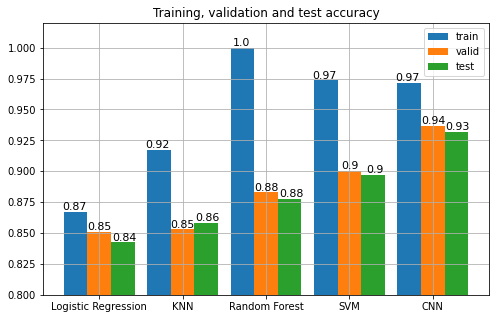

In [ ]:
accuracy_comparison.plot.bar(figsize = (8,5), rot = 0, grid=True, ylim = (0.8, 1.02), width = .85)
for rect in bar1 + bar2 + bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, round(height,2), ha='center', va='bottom', fontsize=11, rotation = 0)
_ = plt.title('Training, validation and test accuracy') 

In [ ]:
# bar_width = 0.3
# bar3 = plt.bar(np.arange(5), np.array(accuracy_comparison.loc[:,['test']]).flatten(), bar_width)

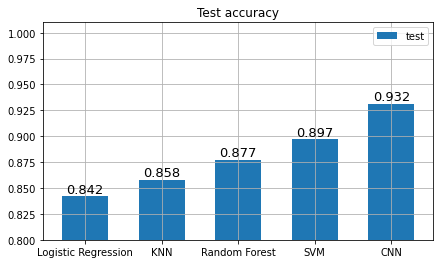

In [ ]:
accuracy_comparison.loc[:,['test']].plot.bar(figsize = (7,4), rot = 0, grid=True, ylim = (0.8, 1.01), width = .6 )
for rect in bar3:# + bar2 + bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, round(height,3), ha='center', va='bottom', fontsize=13)
_ = plt.title('Test accuracy') 

Running time

In [ ]:
runtime_comparison = pd.DataFrame(np.array([[run_time_logreg_fit, run_time_knn_fit, run_time_rf_fit, run_time_svm_fit, run_time_cnn_fit],
                                    [run_time_logreg_predict, run_time_knn_predict, run_time_rf_predict, run_time_svm_predict, run_time_cnn_predict]]), 
                                    index = ['fit', 'predict'] , columns=['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'CNN']).T
print('Running time comparisons')
runtime_comparison

Running time comparisons


,fit,predict
Logistic Regression,30.854066,0.158078
KNN,8.285437,2681.087275
Random Forest,77.363281,2.877203
SVM,421.601810,1088.646081
CNN,192.927353,4.702383


In [ ]:
# bar_width = 0.32
# bar1 = plt.bar(np.arange(5) - bar_width/2, np.array(runtime_comparison.loc[:,['fit']]).flatten(), bar_width)
# bar2 = plt.bar(np.arange(5) + bar_width/2, np.array(runtime_comparison.loc[:,['predict']]).flatten(), bar_width)

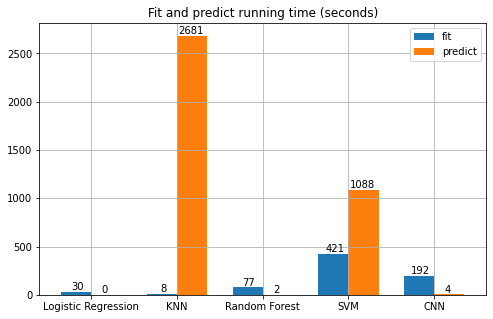

In [ ]:
runtime_comparison.plot.bar(figsize = (8,5), rot = 0, grid=True, width = 0.7 )
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, int(height), ha='center', va='bottom')
_ = plt.title('Fit and predict running time (seconds)') 
